<a href="https://colab.research.google.com/github/Quddos/machine-learning/blob/main/AP24135010028.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [2]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

**Analyzing California Housing Dataset.**

1. **Analyze the input features and determine which
attribute has the strongest linear relationship with
the house prices.**

In [3]:
import pandas as pd
import numpy as np

# Recreate dataset
data = {
    "longitude":[-122.23,-122.22,-122.24,-122.25,-122.25,-122.25,-122.25],
    "latitude":[37.88,37.86,37.85,37.85,37.85,37.85,37.84],
    "housing_median_age":[41,21,52,52,52,52,52],
    "total_rooms":[880,7099,1467,1274,1627,919,2535],
    "total_bedrooms":[129,1106,190,235,280,213,489],
    "population":[322,2401,496,558,565,413,1094],
    "households":[126,1138,177,219,259,193,514],
    "median_income":[8.3252,8.3014,7.2574,5.6431,3.8462,4.0368,3.6591],
    "median_house_value":[452600,358500,352100,341300,342200,269700,299200]
}
df = pd.DataFrame(data)

target = "median_house_value"
features = [c for c in df.columns if c != target and c != "ocean_proximity"]

corrs = {}
for f in features:
    x = df[f].values
    y = df[target].values
    x_mean, y_mean = x.mean(), y.mean()
    num = np.sum((x-x_mean)*(y-y_mean))
    den = np.sqrt(np.sum((x-x_mean)**2)) * np.sqrt(np.sum((y-y_mean)**2))
    r = num/den
    corrs[f] = r

pd.DataFrame.from_dict(corrs, orient="index", columns=["correlation"]).sort_values("correlation", key=np.abs, ascending=False)


,correlation
latitude,0.875095
median_income,0.770342
longitude,0.629512
housing_median_age,-0.396323
total_bedrooms,-0.086886
households,-0.078429
population,-0.058745
total_rooms,0.006627


n=20640, p=8
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Correlations sorted by |r|:
   feature  pearson_r
    MedInc   0.688075
  AveRooms   0.151948
  Latitude  -0.144160
  HouseAge   0.105623
 AveBedrms  -0.046701
 Longitude  -0.045967
Population  -0.024650
  AveOccup  -0.023737

Selected best feature: MedInc (r = 0.6881)


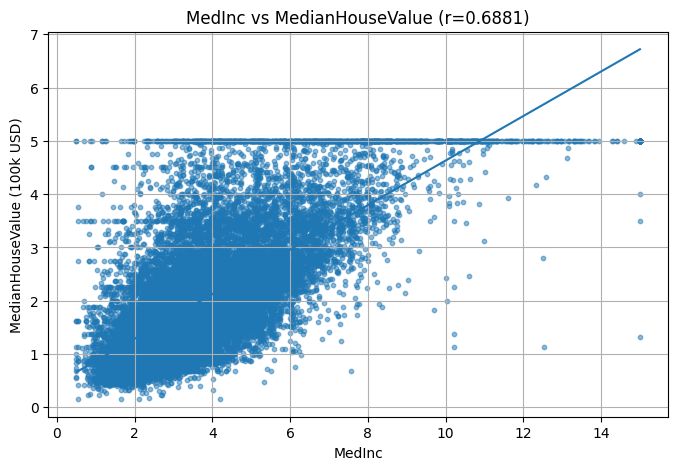

In [4]:
# Save this as analyze_california_corr.py and run locally (requires internet to fetch dataset)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# 1. Load
cal = fetch_california_housing()
X = cal.data            # shape (n_samples, n_features)
y = cal.target          # median house value (in 100k USD)
features = cal.feature_names

n, p = X.shape
print(f"n={n}, p={p}")
print("Features:", features)

# 2. Manual Pearson correlations (no np.corrcoef, show manual sums)
y_mean = np.mean(y)
y_centered = y - y_mean
den_y = np.sqrt(np.sum(y_centered**2))

rows = []
for j, name in enumerate(features):
    x = X[:, j]
    x_mean = np.mean(x)
    x_centered = x - x_mean
    numerator = np.sum(x_centered * y_centered)
    denom = np.sqrt(np.sum(x_centered**2)) * den_y
    r = numerator / denom
    rows.append((name, r))

df_corr = pd.DataFrame(rows, columns=['feature','pearson_r'])
df_corr['abs_r'] = df_corr['pearson_r'].abs()
df_corr = df_corr.sort_values('abs_r', ascending=False).reset_index(drop=True)
print("\nCorrelations sorted by |r|:")
print(df_corr[['feature','pearson_r']].to_string(index=False))

best_feature = df_corr.loc[0,'feature']
best_r = df_corr.loc[0,'pearson_r']
print(f"\nSelected best feature: {best_feature} (r = {best_r:.4f})")

# 3. Scatter plot to inspect linearity
x_best = X[:, list(features).index(best_feature)]
plt.figure(figsize=(8,5))
plt.scatter(x_best, y, s=10, alpha=0.5)
# add linear fit line (simple least squares via polyfit)
m, b = np.polyfit(x_best, y, 1)
x_line = np.linspace(x_best.min(), x_best.max(), 200)
plt.plot(x_line, m*x_line + b)    # default Matplotlib colors
plt.xlabel(best_feature)
plt.ylabel('MedianHouseValue (100k USD)')
plt.title(f'{best_feature} vs MedianHouseValue (r={best_r:.4f})')
plt.grid(True)
plt.show()


**Implement Simple Linear Regression on the following
dataset:**